## Capstone Project 

##### We created our repo on git hub, uploaded data sets in our git hub rep of project_analysis_booking_com
##### We have successfully loaded our data sets for analysis, first data set is booking_hotel.csv
##### and second is trip advisor.csv
##### rename our data set to df_booking_hotel, second one df_trip_advisor

In [70]:
#import
import pandas as pd
import numpy as np
import matplotlib as pyplot
import seaborn as sns

## Import data

In [71]:
#errors were for line 8,13,15,27 (skipped while running the error)
#try:
   #df = pd.read_csv('data/tripadvisor_room.csv', error_bad_lines=False)
#except pd.errors.ParserError as e:
    #print(f"ParserError: {e}")
    

In [72]:

df_tripadvisor_room = pd.read_csv('data/tripadvisor_room.csv')

In [73]:
df_tripadvisor_room.head()

,property name,Room Price (in BDT or any other currency),review_count,Comment about room
0,1. SALA Samui Choengmon Beach Resort,"�45,854","2,820","The breakfast is excellent, the pools are real..."
1,"2. Napasai A Belmond Hotel Koh Samui""","�29,666","1,191","We a had perfect view at the beach,"
2,3. Pimalai Resort and Spa,"�31,667","3,287",It has everything
3,4. Avani+ Mai Khao Phuket Suites & Villas,"�23,887",144,the villa was very ...
4,5. Sheraton Samui Resort,"�18,816","1,006",Me & my wife stayed there for 3 Nights and we ...


In [74]:
df_tripadvisor_room.tail()

,property name,Room Price (in BDT or any other currency),review_count,Comment about room
4472,Irantis Villa,NaN,0,NaN
4473,DHH - Al Tajer,NaN,0,NaN
4474,Shaibani Building,NaN,0,NaN
4475,Koh - Botanica,NaN,0,NaN
4476,HiGuests - Park View Tower,NaN,0,NaN


In [75]:
df_tripadvisor_room.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4477 entries, 0 to 4476
Data columns (total 4 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   property name                              4477 non-null   object
 1   Room Price (in BDT or any other currency)  3131 non-null   object
 2   review_count                               4477 non-null   object
 3   Comment about room                         3473 non-null   object
dtypes: object(4)
memory usage: 140.0+ KB


In [76]:
#checking for null values in all columns
df_tripadvisor_room.isnull().sum()

property name                                   0
Room Price (in BDT or any other currency)    1346
review_count                                    0
Comment about room                           1004
dtype: int64

### DATA CLEANING

In [77]:
#lowercase for column names and add '_' between each word 
df_tripadvisor_room.columns = df_tripadvisor_room.columns.str.lower().str.replace(' ', '_')

In [78]:
df_tripadvisor_room.columns

Index(['property_name_', 'room_price_(in_bdt_or_any_other_currency)',
       'review_count', 'comment_about_room'],
      dtype='object')

In [79]:
# rename column names
df_tripadvisor_room.rename(columns={'property_name_': 'property_name','comment_about_room':'room_reviews'},inplace = True)

In [80]:
df_tripadvisor_room.columns

Index(['property_name', 'room_price_(in_bdt_or_any_other_currency)',
       'review_count', 'room_reviews'],
      dtype='object')

In [81]:
#removing numbers before property_name
df_tripadvisor_room['property_name'] = df_tripadvisor_room['property_name'].str.lstrip('0123456789.  ')

In [82]:
#removing special characters before and after property name
df_tripadvisor_room['property_name'] = df_tripadvisor_room['property_name'].str.removesuffix('"').str.removeprefix('"').str.replace('�','')

#justification of columns
df_tripadvisor_room['property_name'] = df_tripadvisor_room['property_name'].str.ljust(50)

# convert to title case
df_tripadvisor_room['property_name'] = df_tripadvisor_room['property_name'].str.title()

In [83]:
# unique hotel name
df_tripadvisor_room['property_name'].nunique()

4338

In [84]:
df_tripadvisor_room.head()

,property_name,room_price_(in_bdt_or_any_other_currency),review_count,room_reviews
0,Sala Samui Choengmon Beach Resort ...,"�45,854","2,820","The breakfast is excellent, the pools are real..."
1,Napasai A Belmond Hotel Koh Samui ...,"�29,666","1,191","We a had perfect view at the beach,"
2,Pimalai Resort And Spa ...,"�31,667","3,287",It has everything
3,Avani+ Mai Khao Phuket Suites & Villas ...,"�23,887",144,the villa was very ...
4,Sheraton Samui Resort ...,"�18,816","1,006",Me & my wife stayed there for 3 Nights and we ...


In [85]:
df_tripadvisor_room['property_name'].head(10)

0    Sala Samui Choengmon Beach Resort             ...
1    Napasai A Belmond Hotel Koh Samui             ...
2    Pimalai Resort And Spa                        ...
3    Avani+ Mai Khao Phuket Suites & Villas        ...
4    Sheraton Samui Resort                         ...
5    Sala Samui Chaweng Beach Resort               ...
6    Phuket Marriott Resort And Spa Nai Yang Beach ...
7    Centara Reserve Samui                         ...
8    W Koh Samui                                   ...
9    Melia Koh Samui                               ...
Name: property_name, dtype: object

In [86]:
##replace('�','')
df_tripadvisor_room['room_price_(in_bdt_or_any_other_currency)'] = df_tripadvisor_room['room_price_(in_bdt_or_any_other_currency)'].str.replace('�','')

In [87]:
# replace('�','"')
df_tripadvisor_room['room_reviews'] = df_tripadvisor_room['room_reviews'].str.replace('�','').str.replace('"','').str.replace('.', '',regex=True)

#reviews in lower case & justification
df_tripadvisor_room['room_reviews'] = df_tripadvisor_room['room_reviews'].str.lower().str.ljust(60)

In [88]:
df_tripadvisor_room['room_reviews']= df_tripadvisor_room['room_reviews'].fillna('0')

In [89]:
df_tripadvisor_room['room_reviews'].head(30)

0     the breakfast is excellent, the pools are real...
1     we a had perfect view at the beach,           ...
2     it has everything                             ...
3     the villa was very                            ...
4     me & my wife stayed there for 3 nights and we ...
5     if you prefer private room with nice view go w...
6     the hotel is near the airport the service was ...
7     good food                                     ...
8     the room are very beautiful and comfortable, t...
9      so fantastic and we enjoy our stayed at melia...
10    grateful for the staff for putting together th...
11    i stay at holiday ao nang resert second time i...
12     one of the greatest moments of our little gir...
13    hong island, amazing view from the pool, good ...
14    this hotel is fabulous, staff were all super  ...
15    its such an amazing place;                    ...
16    facilities is perfect staff they are very frie...
17    private and peaceful beach always clean th

In [90]:
df_tripadvisor_room.describe(include = 'object')

,property_name,room_price_(in_bdt_or_any_other_currency),review_count,room_reviews
count,4477,3131,4477,4477
unique,4338,2051,1612,2822
top,Hilton Dubai Palm Jumeirah ...,View all 5 deals,0,0
freq,10,493,415,1004


In [91]:
df_tripadvisor_room[df_tripadvisor_room['review_count']=='0'].groupby('review_count')[['room_reviews', 'property_name']].count()

,room_reviews,property_name
review_count,,
0,415,415


In [92]:
#df_tripadvisor_room[df_tripadvisor_room['review_count'].isnull()].groupby('review_count')[['room_reviews', 'property_name']].count()

In [93]:
#df_tripadvisor_room[(df_tripadvisor_room['room_reviews']=='x')].groupby('property_name')[['room_reviews']].count()

In [94]:
#df_tripadvisor_room['room_price_(in_bdt_or_any_other_currency)'].fillna('y', inplace=True)

In [95]:
# # Exclude rows with NaN or 0 values in 'review_count'
# filtered_df = df_tripadvisor_room[(df_tripadvisor_room['review_count'].notna()) & (df_tripadvisor_room['review_count'] != '0')]
# filtered_df

In [96]:
#  Exclude rows with NaN or 0 values in 'review_count' and 'room_price' columns
# filtered_df2 = df_tripadvisor_room[
#     (df_tripadvisor_room['review_count'].notna()) & 
#     (df_tripadvisor_room['review_count'] != '0') & 
#     (df_tripadvisor_room['room_price_(in_bdt_or_any_other_currency)']!='y') & 
#     (df_tripadvisor_room['room_price_(in_bdt_or_any_other_currency)'] != '0')
# ]


In [97]:
#df_tripadvisor_room[df_tripadvisor_room['room_price_(in_bdt_or_any_other_currency)']=='y'].groupby('property_name')[['room_price_(in_bdt_or_any_other_currency)']].count()

## CHANGE DATA TYPES

In [98]:
# convert string to numeric
# replace ',' wth ''
df_tripadvisor_room['review_count'] = df_tripadvisor_room['review_count'].str.replace(',', '').str.replace('1 review', '1')

df_tripadvisor_room['room_price_(in_bdt_or_any_other_currency)'] = df_tripadvisor_room['room_price_(in_bdt_or_any_other_currency)'].str.replace(',', '')


In [99]:
# check for changes made
df_tripadvisor_room['review_count'][4072:4110]

4072      2
4073      8
4074      1
4075      1
4076      1
4077      1
4078      1
4079      1
4080      1
4081      0
4082    477
4083     86
4084      1
4085      1
4086      1
4087      1
4088      1
4089      3
4090      1
4091      3
4092      1
4093      1
4094      3
4095      3
4096      2
4097      1
4098      1
4099      1
4100      2
4101      2
4102    106
4103      4
4104      7
4105      6
4106      1
4107      2
4108     18
4109      1
Name: review_count, dtype: object

In [100]:
#change to int
df_tripadvisor_room['review_count'] = pd.to_numeric (df_tripadvisor_room['review_count'])

In [101]:
df_tripadvisor_room['room_price_(in_bdt_or_any_other_currency)']=df_tripadvisor_room['room_price_(in_bdt_or_any_other_currency)'].str.extract(r'(\d+\.\d+|\d+)')

In [102]:
df_tripadvisor_room['room_price_(in_bdt_or_any_other_currency)'].head()

0    45854
1    29666
2    31667
3    23887
4    18816
Name: room_price_(in_bdt_or_any_other_currency), dtype: object

In [103]:
df_tripadvisor_room['room_price_(in_bdt_or_any_other_currency)'].fillna('0', inplace=True)

In [104]:
# change to float 
df_tripadvisor_room['room_price_(in_bdt_or_any_other_currency)'] = pd.to_numeric(df_tripadvisor_room['room_price_(in_bdt_or_any_other_currency)'].astype(int))

In [105]:
df_tripadvisor_room['room_price_(in_bdt_or_any_other_currency)'].head()

0    45854
1    29666
2    31667
3    23887
4    18816
Name: room_price_(in_bdt_or_any_other_currency), dtype: int64

In [106]:
df_tripadvisor_room['room_price_(in_bdt_or_any_other_currency)'] = df_tripadvisor_room['room_price_(in_bdt_or_any_other_currency)']*0.0091

In [107]:
df_tripadvisor_room['room_price_(in_bdt_or_any_other_currency)'][400:412]

400    24.6064
401    72.1812
402    75.6028
403    67.9315
404    17.2081
405    11.2385
406    75.0022
407    16.1889
408    38.0926
409    68.6413
410    47.9479
411    21.3395
Name: room_price_(in_bdt_or_any_other_currency), dtype: float64

In [108]:
df_tripadvisor_room.tail()

,property_name,room_price_(in_bdt_or_any_other_currency),review_count,room_reviews
4472,Irantis Villa ...,0.0,0,0
4473,Dhh - Al Tajer ...,0.0,0,0
4474,Shaibani Building ...,0.0,0,0
4475,Koh - Botanica ...,0.0,0,0
4476,Higuests - Park View Tower ...,0.0,0,0


In [109]:
df_tripadvisor_room[2575:2600]

,property_name,room_price_(in_bdt_or_any_other_currency),review_count,room_reviews
2575,Hotel Saint Germain Des Pres ...,0.0000,399,0
2576,Hotel Apolonia Mouffetard ...,0.0455,809,room upgrade ...
2577,H Paris Marais Hotel ...,0.0455,363,0
2578,District Republique ...,0.0455,237,0
2579,L'Ouest Hotel ...,0.0364,388,clean and modern room ...
2580,Hotel Opera ...,0.0546,990,great spacious room ...
2581,Hotel Diva Opera ...,0.0455,435,room was large ...
2582,Hotel Verlaine ...,0.0364,163,0
2583,Hotel Fontaines Du Luxembourg ...,0.0546,445,room was surprisingly large ...
2584,Best Western Quartier Latin Pantheon ...,0.0455,426,room clean ...


In [110]:
df_tripadvisor_room.head()

,property_name,room_price_(in_bdt_or_any_other_currency),review_count,room_reviews
0,Sala Samui Choengmon Beach Resort ...,417.2714,2820,"the breakfast is excellent, the pools are real..."
1,Napasai A Belmond Hotel Koh Samui ...,269.9606,1191,"we a had perfect view at the beach, ..."
2,Pimalai Resort And Spa ...,288.1697,3287,it has everything ...
3,Avani+ Mai Khao Phuket Suites & Villas ...,217.3717,144,the villa was very ...
4,Sheraton Samui Resort ...,171.2256,1006,me & my wife stayed there for 3 nights and we ...


In [111]:
# check data types
df_tripadvisor_room.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4477 entries, 0 to 4476
Data columns (total 4 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   property_name                              4477 non-null   object 
 1   room_price_(in_bdt_or_any_other_currency)  4477 non-null   float64
 2   review_count                               4477 non-null   int64  
 3   room_reviews                               4477 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 140.0+ KB


In [112]:
# check duplicates
df_tripadvisor_room.duplicated(keep='first').value_counts()

False    4414
True       63
dtype: int64

In [113]:
#drop duplicates
df_tripadvisor_room.drop_duplicates(inplace=True)

In [114]:
df_tripadvisor_room.shape

(4414, 4)

In [115]:
df_tripadvisor_room.describe()

,room_price_(in_bdt_or_any_other_currency),review_count
count,4414.000000,4414.000000
mean,72.509709,718.687812
std,193.002547,1271.072338
min,0.000000,0.000000
25%,0.000000,59.000000
50%,0.054600,277.000000
75%,69.066725,808.000000
max,4078.720100,14124.000000


In [116]:
df_tripadvisor_room.describe(include='object')

,property_name,room_reviews
count,4414,4414
unique,4338,2822
top,Hilton Dubai Jumeirah ...,0
freq,6,996


In [117]:
# Unique property names
df_tripadvisor_room['property_name'].nunique()

4338

In [118]:
#RENAME COLUMN NAMES
df_tripadvisor_room.rename(columns={'room_price_(in_bdt_or_any_other_currency)': 'room_price(USD)', 'property_name': 'hotel_name'},inplace = True)

In [119]:
#chk for column names
df_tripadvisor_room.columns

Index(['hotel_name', 'room_price(USD)', 'review_count', 'room_reviews'], dtype='object')

In [120]:
df_tripadvisor_room.tail(200)

,hotel_name,room_price(USD),review_count,room_reviews
4273,Al Rousha Hotel Apartments ...,0.0,0,0
4274,Wider View - Jumeirah Beach Residence - Sadaf ...,0.0,0,0
4275,Luxury Bedspaces For Ladies In Deira ...,0.0,0,0
4276,Duna Hotel 2 ...,0.0,0,0
4278,Grand Pearl Hostel (Men Only) ...,0.0,0,0
...,...,...,...,...
4472,Irantis Villa ...,0.0,0,0
4473,Dhh - Al Tajer ...,0.0,0,0
4474,Shaibani Building ...,0.0,0,0
4475,Koh - Botanica ...,0.0,0,0


In [121]:
df_tripadvisor_room.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4414 entries, 0 to 4476
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   hotel_name       4414 non-null   object 
 1   room_price(USD)  4414 non-null   float64
 2   review_count     4414 non-null   int64  
 3   room_reviews     4414 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 172.4+ KB


## Exploratory Data Analysis

In [122]:
#final dataset
df_tripadvisor_room.head()


,hotel_name,room_price(USD),review_count,room_reviews
0,Sala Samui Choengmon Beach Resort ...,417.2714,2820,"the breakfast is excellent, the pools are real..."
1,Napasai A Belmond Hotel Koh Samui ...,269.9606,1191,"we a had perfect view at the beach, ..."
2,Pimalai Resort And Spa ...,288.1697,3287,it has everything ...
3,Avani+ Mai Khao Phuket Suites & Villas ...,217.3717,144,the villa was very ...
4,Sheraton Samui Resort ...,171.2256,1006,me & my wife stayed there for 3 nights and we ...


In [123]:
df_tripadvisor_room.columns

Index(['hotel_name', 'room_price(USD)', 'review_count', 'room_reviews'], dtype='object')

In [124]:
df_tripadvisor_room.describe()

,room_price(USD),review_count
count,4414.000000,4414.000000
mean,72.509709,718.687812
std,193.002547,1271.072338
min,0.000000,0.000000
25%,0.000000,59.000000
50%,0.054600,277.000000
75%,69.066725,808.000000
max,4078.720100,14124.000000


In [125]:
df_tripadvisor_room.describe(include='object')

,hotel_name,room_reviews
count,4414,4414
unique,4338,2822
top,Hilton Dubai Jumeirah ...,0
freq,6,996


In [126]:
df_tripadvisor_room

,hotel_name,room_price(USD),review_count,room_reviews
0,Sala Samui Choengmon Beach Resort ...,417.2714,2820,"the breakfast is excellent, the pools are real..."
1,Napasai A Belmond Hotel Koh Samui ...,269.9606,1191,"we a had perfect view at the beach, ..."
2,Pimalai Resort And Spa ...,288.1697,3287,it has everything ...
3,Avani+ Mai Khao Phuket Suites & Villas ...,217.3717,144,the villa was very ...
4,Sheraton Samui Resort ...,171.2256,1006,me & my wife stayed there for 3 nights and we ...
...,...,...,...,...
4472,Irantis Villa ...,0.0000,0,0
4473,Dhh - Al Tajer ...,0.0000,0,0
4474,Shaibani Building ...,0.0000,0,0
4475,Koh - Botanica ...,0.0000,0,0


In [127]:
#EXPENSIVE HOTEL
df_tripadvisor_room.sort_values(by='room_price(USD)' , ascending=False).iloc[0]['hotel_name']

'Rixos The Palm Hotel & Suites                     '

In [128]:
#CHEAP HOTEL
df_tripadvisor_room.sort_values(by='room_price(USD)' , ascending=True).iloc[0]['hotel_name']

'Higuests - Park View Tower                        '

In [129]:
# highest_rating_hotel
df_tripadvisor_room.sort_values(by='review_count' , ascending=False).iloc[0]['hotel_name']

'Jw Marriott Marquis Hotel Dubai                   '

In [130]:
# lowest_rating_hotel
df_tripadvisor_room.sort_values(by='review_count' , ascending=True).iloc[0]['hotel_name']

'Higuests - Park View Tower                        '

In [131]:
filtered_df = df_tripadvisor_room[(df_tripadvisor_room['review_count'].notna()) & (df_tripadvisor_room['review_count'] != 0)] = df_tripadvisor_room[(df_tripadvisor_room['review_count'].notna()) & (df_tripadvisor_room['review_count'] != 0)]

In [132]:
filtered_df

,hotel_name,room_price(USD),review_count,room_reviews
0,Sala Samui Choengmon Beach Resort ...,417.2714,2820,"the breakfast is excellent, the pools are real..."
1,Napasai A Belmond Hotel Koh Samui ...,269.9606,1191,"we a had perfect view at the beach, ..."
2,Pimalai Resort And Spa ...,288.1697,3287,it has everything ...
3,Avani+ Mai Khao Phuket Suites & Villas ...,217.3717,144,the villa was very ...
4,Sheraton Samui Resort ...,171.2256,1006,me & my wife stayed there for 3 nights and we ...
...,...,...,...,...
4258,Al Ashrafia Holiday Homes ...,0.0000,4,city walk to burj khalifa my trip was business...
4259,Hi Guests Vacation Homes - Park Island Sanibel...,0.0000,2,sanibel my issue is with higuests vacation hom...
4261,Victoria Hotel ...,0.0000,8,were visiting dubai the entire experience from...
4265,Maison Privee - Tiara Ruby ...,0.0000,2,changes we met rami (who is the so called owne...


<Axes: xlabel='room_price(USD)', ylabel='review_count'>

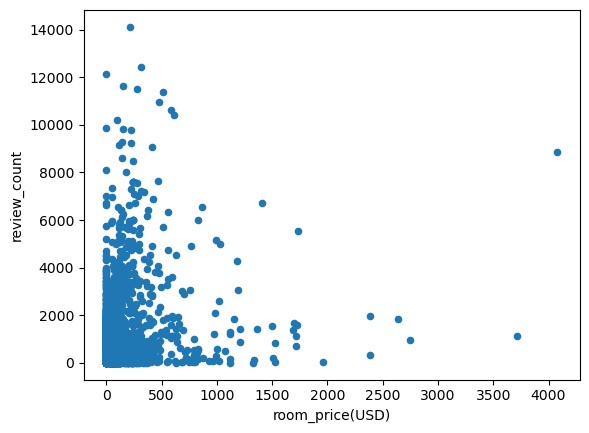

In [133]:
# Relation between room_price(USD) and review_count
df_tripadvisor_room.plot(kind='scatter', x = 'room_price(USD)', y= 'review_count')

### There seems to be no relation between price and rating

### Cleaning comments to analyze 

In [134]:
df_tripadvisor_room['room_reviews'].head()

0    the breakfast is excellent, the pools are real...
1    we a had perfect view at the beach,           ...
2    it has everything                             ...
3    the villa was very                            ...
4    me & my wife stayed there for 3 nights and we ...
Name: room_reviews, dtype: object

### Install NLTK (Natural Language Toolkit) library 

In [135]:
# Tokenization import data
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')


ModuleNotFoundError: No module named 'nltk'

In [ ]:
# CONVERT DATA TO STRING
df_tripadvisor_room['room_reviews'] = df_tripadvisor_room['room_reviews'].astype(str)

In [ ]:
#remove special chatracters
import re

def remove_special_characters(text):
    # Use regular expression to remove non-alphanumeric characters and spaces
    cleaned_text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return cleaned_text


In [ ]:
# call function
df_tripadvisor_room['room_reviews'] = df_tripadvisor_room['room_reviews'].apply(remove_special_characters)

In [ ]:
# splitting text documents as seperate tokens or words
df_tripadvisor_room['room_reviews'] = df_tripadvisor_room['room_reviews'].apply(lambda text: word_tokenize(text))

In [ ]:
df_tripadvisor_room['room_reviews']

0       [the, breakfast, is, excellent, the, pools, ar...
1             [we, a, had, perfect, view, at, the, beach]
2                                   [it, has, everything]
3                                 [the, villa, was, very]
4       [me, my, wife, stayed, there, for, 3, nights, ...
                              ...                        
4472                                                  [0]
4473                                                  [0]
4474                                                  [0]
4475                                                  [0]
4476                                                  [0]
Name: room_reviews, Length: 4414, dtype: object

In [ ]:
# removing stop words
nltk.download('stopwords') 
from nltk.corpus import stopwords              #Download stopwords data 
stop_words = set(stopwords.words('english'))   #Load the English stop words


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/neuefische/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# function to remove stop words
def remove_stopwords(words):
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return filtered_words

# Apply the function to the 'room_reviews' column
df_tripadvisor_room['room_reviews'] = df_tripadvisor_room['room_reviews'].apply(remove_stopwords)


In [ ]:
df_tripadvisor_room['room_reviews'].head(60)

0     [breakfast, excellent, pools, really, nice, be...
1                                [perfect, view, beach]
2                                          [everything]
3                                               [villa]
4     [wife, stayed, 3, nights, really, enjoyed, eve...
5     [prefer, private, room, nice, view, go, oceanf...
6     [hotel, near, airport, service, excellent, pat...
7                                          [good, food]
8     [room, beautiful, comfortable, big, pool, outd...
9     [fantastic, enjoy, stayed, melia, koh, samui, ...
10    [grateful, staff, putting, together, wonderful...
11    [stay, holiday, ao, nang, resert, second, time...
12    [one, greatest, moments, little, girls, life, ...
13    [hong, island, amazing, view, pool, good, food...
14                      [hotel, fabulous, staff, super]
15                                     [amazing, place]
16    [facilities, perfect, staff, friendly, gently,...
17    [private, peaceful, beach, always, clean, 

In [ ]:
# mean, max, min
df_tripadvisor_room['room_reviews'].str.len().mean()

7.796782963298595

In [ ]:
df_tripadvisor_room['room_reviews'].str.len().max()

26

In [ ]:
max_length = df_tripadvisor_room[df_tripadvisor_room['room_reviews'].str.len() == max]


In [ ]:
result = max_length.groupby('room_reviews')['hotel_name'].count()

In [ ]:
result

Series([], Name: hotel_name, dtype: int64)

In [ ]:
df_tripadvisor_room['room_reviews'].str.len().min()

0

### Lemmitization

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/neuefische/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# function for lemmatize
lemmatizer = WordNetLemmatizer()
def lemmatize_text(words):
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return lemmatized_words

In [ ]:
df_tripadvisor_room['room_reviews'] = df_tripadvisor_room['room_reviews'].apply(lemmatize_text)

In [ ]:
df_tripadvisor_room['room_reviews'][4414]

['0']

### SENTIMENT ANALYSIS

In [ ]:
df_tripadvisor_room['room_reviews']

0       [breakfast, excellent, pool, really, nice, bea...
1                                  [perfect, view, beach]
2                                            [everything]
3                                                 [villa]
4       [wife, stayed, 3, night, really, enjoyed, ever...
                              ...                        
4472                                                  [0]
4473                                                  [0]
4474                                                  [0]
4475                                                  [0]
4476                                                  [0]
Name: room_reviews, Length: 4414, dtype: object

In [ ]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()


In [ ]:
# Function to analyze sentiment using VADER
def analyze_sentiment(text):
    sentiment_scores = analyzer.polarity_scores(text)
    # Determine sentiment based on compound score
    if sentiment_scores['compound'] >= 0.05:
        return 'positive'
    elif sentiment_scores['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'


In [ ]:
# Apply sentiment analysis to each text entry in the 'room_reviews' column
df_tripadvisor_room['sentiment'] = df_tripadvisor_room['room_reviews'].apply(lambda x: ' '.join(x))  # Convert tokens back to a string
df_tripadvisor_room['sentiment'] = df_tripadvisor_room['sentiment'].apply(analyze_sentiment)

# Now, the 'sentiment' column contains the sentiment classification for each text entry


In [ ]:
df_tripadvisor_room['sentiment'].tail()

4472    neutral
4473    neutral
4474    neutral
4475    neutral
4476    neutral
Name: sentiment, dtype: object

In [ ]:
df_tripadvisor_room['hotel_name'].nunique()

4338

In [ ]:
df_tripadvisor_room['sentiment'].value_counts()

positive    2724
neutral     1549
negative     141
Name: sentiment, dtype: int64

In [ ]:
df = df_tripadvisor_room[(df_tripadvisor_room['sentiment'] == 'negative')  & (df_tripadvisor_room['room_reviews'])]

In [ ]:
df

,hotel_name,room_price(USD),review_count,room_reviews,sentiment
82,Kanda Residences Pool Villas ...,196.6965,383,"[visited, many, time, year, course, covid, per...",negative
158,Nora Buri Resort & Spa ...,124.7883,1892,"[stayed, hillside, villa, private, pool, nothi...",negative
234,Novotel Bangkok Sukhumvit 4 ...,85.2033,449,"[khun, kook, provide, late, check, departure, ...",negative
288,Khaolak Paradise Resort ...,83.0921,298,"[really, place, 36, room, set, thatched, roof,...",negative
355,Patong Bay Residence ...,30.7853,221,"[found, strange, kitchen, microwave, kitchen, ...",negative
...,...,...,...,...,...
4249,Al Kawakeeb Hotel ...,0.0000,7,"[illiterate, staff, reception, irresponsible, ...",negative
4251,Maison Privee - Five Palm Jumeirah Residences ...,0.0000,5,"[maison, priveits, villa, 41, palm, know, pand...",negative
4253,One Perfect Stay Jumeirah Heights ...,0.0000,4,"[son, arrived, stunk, badly, mold, mildew, flo...",negative
4256,Dream Inn Dubai Signature Villa ...,0.0000,8,"[reason, 1, bad, customer, service, 2, picture...",negative


In [ ]:
df_new_dataset = df_tripadvisor_room[(df_tripadvisor_room['sentiment']!='neutral')]

In [ ]:
df_new_dataset

,hotel_name,room_price(USD),review_count,room_reviews,sentiment
0,Sala Samui Choengmon Beach Resort ...,417.2714,2820,"[breakfast, excellent, pool, really, nice, bea...",positive
1,Napasai A Belmond Hotel Koh Samui ...,269.9606,1191,"[perfect, view, beach]",positive
4,Sheraton Samui Resort ...,171.2256,1006,"[wife, stayed, 3, night, really, enjoyed, ever...",positive
5,Sala Samui Chaweng Beach Resort ...,239.2754,968,"[prefer, private, room, nice, view, go, oceanf...",positive
6,Phuket Marriott Resort And Spa Nai Yang Beach ...,159.5503,1474,"[hotel, near, airport, service, excellent, pat...",positive
...,...,...,...,...,...
4256,Dream Inn Dubai Signature Villa ...,0.0000,8,"[reason, 1, bad, customer, service, 2, picture...",negative
4257,Oyo 180 Evin Hotel ...,0.0000,3,"[crowded, noisy, area, staff, welcoming, hotel...",positive
4258,Al Ashrafia Holiday Homes ...,0.0000,4,"[city, walk, burj, khalifa, trip, business, in...",positive
4259,Hi Guests Vacation Homes - Park Island Sanibel...,0.0000,2,"[sanibel, issue, higuests, vacation, home, bur...",positive


In [ ]:
df_1 = df_new_dataset[df_new_dataset['room_price(USD)']== 0]

In [ ]:
df_1

,hotel_name,room_price(USD),review_count,room_reviews,sentiment
28,Hua Hin Marriott Resort & Spa ...,0.0,3230,"[love, everything, hotel, facility, great, kid...",positive
29,Anantara Mai Khao Phuket Villas ...,0.0,2872,"[calm, relaxing, atmosphere, nice, beach, area...",positive
1346,Ten Moons Lipe Resort ...,0.0,903,"[great, location]",positive
1347,The Okura Prestige Bangkok ...,0.0,4382,[outstanding],positive
1348,Banyan Tree Bangkok ...,0.0,12153,"[w, pleasant, stay, banyan, tree, bangkok, khu...",positive
...,...,...,...,...,...
4256,Dream Inn Dubai Signature Villa ...,0.0,8,"[reason, 1, bad, customer, service, 2, picture...",negative
4257,Oyo 180 Evin Hotel ...,0.0,3,"[crowded, noisy, area, staff, welcoming, hotel...",positive
4258,Al Ashrafia Holiday Homes ...,0.0,4,"[city, walk, burj, khalifa, trip, business, in...",positive
4259,Hi Guests Vacation Homes - Park Island Sanibel...,0.0,2,"[sanibel, issue, higuests, vacation, home, bur...",positive


In [ ]:
df_neutral = df_tripadvisor_room[(df_tripadvisor_room['sentiment'] == 'neutral')  & (df_tripadvisor_room['room_reviews'])]

In [ ]:
# dataframe with price & count != 0
df_tripadvisor_reviews = df_tripadvisor_room[(df_tripadvisor_room['room_price(USD)'] != 0)  & (df_tripadvisor_room['review_count']!=0)]

In [ ]:
df_tripadvisor_reviews.shape

(3036, 5)

In [ ]:
# Set the schema to your course name and the table_name variable to 'carriers_' + your initials/group number

schema = 'cgn_analytics_23_3' 
table_name = 'tripadvisor_reviews_gp4'


In [ ]:
# we need psycopg2 for raising possible error message
from sql_functions import get_engine 
engine = get_engine()
# Import psycopg2
import psycopg2

In [ ]:
# Write records stored in a dataframe to SQL database
if engine!=None:
    try:
        df_tripadvisor_reviews.to_sql(name=table_name, # Name of SQL table variable
                        con=engine, # Engine or connection
                        schema=schema, # your class schema variable
                        if_exists='replace', # Drop the table before inserting new values 
                        index=False, # Write DataFrame index as a column
                        chunksize=5000, # Specify the number of rows in each batch to be written at a time
                        method='multi') # Pass multiple values in a single INSERT clause
        print(f"The {table_name} table was imported successfully.")
    # Error handling
    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
        engine = None
else:
    print('No engine')

The tripadvisor_reviews_gp4 table was imported successfully.


### Create a dictionary of words 

In [ ]:
# classification of comments - create list for services for reviews 
 
Accomodation =['pool', 'worst','disappointing', 'room', 'kitchen', 'toilet', 'uncomfortable']
Concierge    =['service','staff', 'internet', 'a.c.', 'unfortunately', 'late', 'check', 'checkin', 'rudely', 'facility', 'pleasant','terrible', 'damaged','checking', 'housekeeper', 'stress', 'bad', 'horrible', 'negative', 'cheap', 'ugly']
Dining_Food  =['food', 'buffet', 'restaurant', 'cafeteria', 'menu', 'quality', 'strange', 'resort']


In [ ]:
# find about which category customers have complaint from negative semtiment 
df_negative_sentiment = df_tripadvisor_reviews[df_tripadvisor_reviews['sentiment']=='negative']

In [ ]:
# function to classify the comment
def classify_comments(comment):
    if any(word in comment for word in Concierge ):
        return 'Concierge'
    elif any(word in comment for word in Dining_Food):
        return 'Dining_Food'
    elif any(word in comment for word in Accomodation):
        return 'Accomodation'
    else:
        return 'Other'


In [ ]:
# apply function
df_negative_sentiment.loc[:, 'category'] = df_negative_sentiment['room_reviews'].apply(classify_comments)


/var/folders/fj/hxf26m1d519gzxl6zq1hqgmm0000gn/T/ipykernel_4433/1855975907.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_negative_sentiment.loc[:, 'category'] = df_negative_sentiment['room_reviews'].apply(classify_comments)


In [ ]:
df_negative_sentiment.head()

,hotel_name,room_price(USD),review_count,room_reviews,sentiment,category
82,Kanda Residences Pool Villas ...,196.6965,383,"[visited, many, time, year, course, covid, per...",negative,Accomodation
158,Nora Buri Resort & Spa ...,124.7883,1892,"[stayed, hillside, villa, private, pool, nothi...",negative,Accomodation
234,Novotel Bangkok Sukhumvit 4 ...,85.2033,449,"[khun, kook, provide, late, check, departure, ...",negative,Concierge
288,Khaolak Paradise Resort ...,83.0921,298,"[really, place, 36, room, set, thatched, roof,...",negative,Accomodation
355,Patong Bay Residence ...,30.7853,221,"[found, strange, kitchen, microwave, kitchen, ...",negative,Dining_Food


In [ ]:
df_negative_sentiment['category'].value_counts()

Concierge       32
Accomodation    15
Other            7
Dining_Food      5
Name: category, dtype: int64

In [ ]:
import matplotlib.pyplot as plt

/var/folders/fj/hxf26m1d519gzxl6zq1hqgmm0000gn/T/ipykernel_4433/1114352035.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-deep')


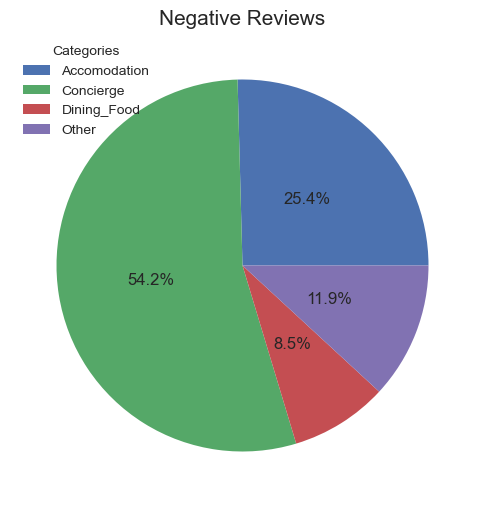

In [ ]:
# Use predefined style
plt.style.use('seaborn-deep') 

# Set figure size
plt.figure(figsize=(6, 12))

# Create pie-chart which shows percentage of observations in each service  category
# 1. Define x-value - we want to get the count of rows for each value in the column using .value_counts()
x = df_negative_sentiment['category'].value_counts(sort=False)
# 2. Define labels
mylabels = ['Accomodation', 'Concierge', 'Dining_Food', 'Other']
# 3. Plot pie chart for variable x, percentage values should be displayed in certain distance 
# between center of pie slice and start of the text as well as in certain fontsize.
plt.pie(x, autopct='%1.1f%%', pctdistance=0.5, textprops={'fontsize': 12})

# Set title
plt.title("Negative Reviews", fontsize = 15)

# Create legend
plt.legend(mylabels, title='Categories')#, loc = 'upper right')

# Show graphicx = df_negative_sentiment['category'].value_counts()
plt.show()

### Distribution between positive and negative reviews

In [ ]:
df_tripadvisor_reviews['sentiment'].value_counts()

positive    2091
neutral      886
negative      59
Name: sentiment, dtype: int64

/var/folders/fj/hxf26m1d519gzxl6zq1hqgmm0000gn/T/ipykernel_4433/3893260453.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-deep')


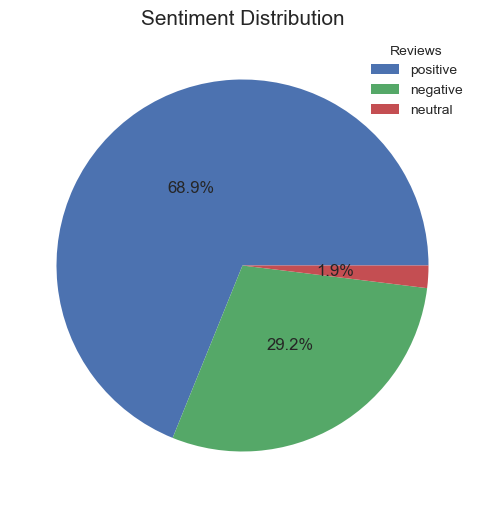

In [ ]:
# Use predefined style
plt.style.use('seaborn-deep') 

# Set figure size
plt.figure(figsize=(6, 12))

# Create pie-chart which shows percentage of observations in each service  category
# 1. Define x-value - we want to get the count of rows for each value in the column using .value_counts()
x = df_tripadvisor_reviews['sentiment'].value_counts(sort=False)
# 2. Define labels
mylabels = ['positive', 'negative', 'neutral']
# 3. Plot pie chart for variable x, percentage values should be displayed in certain distance 
# between center of pie slice and start of the text as well as in certain fontsize.
plt.pie(x, autopct='%1.1f%%', pctdistance=0.5, textprops={'fontsize': 12})

# Set title
plt.title("Sentiment Distribution", fontsize = 15)

# Create legend
plt.legend(mylabels, title = 'Reviews', loc = 'upper right')

# Show graphicx = df_tripadvisor_reviews['sentiment'].value_counts()
plt.show()

### Positive Reviews

In [ ]:
df_positive_reviews = df_tripadvisor_reviews[df_tripadvisor_reviews['sentiment'] == 'positive']

In [ ]:
df_positive_reviews

,hotel_name,room_price(USD),review_count,room_reviews,sentiment
0,Sala Samui Choengmon Beach Resort ...,417.2714,2820,"[breakfast, excellent, pool, really, nice, bea...",positive
1,Napasai A Belmond Hotel Koh Samui ...,269.9606,1191,"[perfect, view, beach]",positive
4,Sheraton Samui Resort ...,171.2256,1006,"[wife, stayed, 3, night, really, enjoyed, ever...",positive
5,Sala Samui Chaweng Beach Resort ...,239.2754,968,"[prefer, private, room, nice, view, go, oceanf...",positive
6,Phuket Marriott Resort And Spa Nai Yang Beach ...,159.5503,1474,"[hotel, near, airport, service, excellent, pat...",positive
...,...,...,...,...,...
3550,Aravi Hotel ...,68.2955,23,"[website, staff, helpful, understanding, noisy...",positive
3551,Royalton Hotel ...,29.4476,63,"[close, union, metro, station, another, 5km, d...",positive
3554,Phoenix Hotel ...,38.6386,56,"[good, quality, room, toilet, everything, bad,...",positive
3690,Grand Square Stay Hotel Apartments ...,46.9924,2,"[verry, good, enjoy, muchhouse, keeping, sajee...",positive


In [ ]:
# classification of comments - create list for services for reviews 
 
Accomodation_service =['excellent', 'room', 'kitchen', 'amazing', 'comfortable', 'clean']
Concierge_service    =['service','staff', 'good', 'facility', 'recommend', 'enjoyed', 'perfect', 'great', 'friendly', 'helpful', 'arrival','checkin', 'checkout', 'check', 'nice', 'smile', 'upgraded']
Dining_Food_service  =['food', 'buffet', 'restaurant', 'cafeteria', 'menu', 'quality', 'delicious', 'resort']


In [ ]:
def classify_reviews(comment):
    if any(word in comment for word in Accomodation_service):
        return 'Accomodation'
    elif any(word in comment for word in Concierge_service):
        return 'Concierge'
    elif any(word in comment for word in Dining_Food_service):
        return 'Dining_Food'
    else:
        return 'Other'

In [ ]:
df_positive_reviews['category']= df_positive_reviews['room_reviews'].apply(classify_reviews)

/var/folders/fj/hxf26m1d519gzxl6zq1hqgmm0000gn/T/ipykernel_4433/3417751778.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_positive_reviews['category']= df_positive_reviews['room_reviews'].apply(classify_reviews)


In [ ]:
df_positive_reviews.head()

,hotel_name,room_price(USD),review_count,room_reviews,sentiment,category
0,Sala Samui Choengmon Beach Resort ...,417.2714,2820,"[breakfast, excellent, pool, really, nice, bea...",positive,Accomodation
1,Napasai A Belmond Hotel Koh Samui ...,269.9606,1191,"[perfect, view, beach]",positive,Concierge
4,Sheraton Samui Resort ...,171.2256,1006,"[wife, stayed, 3, night, really, enjoyed, ever...",positive,Accomodation
5,Sala Samui Chaweng Beach Resort ...,239.2754,968,"[prefer, private, room, nice, view, go, oceanf...",positive,Accomodation
6,Phuket Marriott Resort And Spa Nai Yang Beach ...,159.5503,1474,"[hotel, near, airport, service, excellent, pat...",positive,Accomodation


In [ ]:
df_positive_reviews['room_reviews'].nunique

<bound method IndexOpsMixin.nunique of 0       [breakfast, excellent, pool, really, nice, bea...
1                                  [perfect, view, beach]
4       [wife, stayed, 3, night, really, enjoyed, ever...
5       [prefer, private, room, nice, view, go, oceanf...
6       [hotel, near, airport, service, excellent, pat...
                              ...                        
3550    [website, staff, helpful, understanding, noisy...
3551    [close, union, metro, station, another, 5km, d...
3554    [good, quality, room, toilet, everything, bad,...
3690    [verry, good, enjoy, muchhouse, keeping, sajee...
3991    [suit, u, well, friendly, staff, comfortable, ...
Name: room_reviews, Length: 2091, dtype: object>

In [ ]:
df_positive_reviews['category'].value_counts()

Accomodation    1272
Concierge        535
Other            246
Dining_Food       38
Name: category, dtype: int64

/var/folders/fj/hxf26m1d519gzxl6zq1hqgmm0000gn/T/ipykernel_4433/2284648164.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-deep')


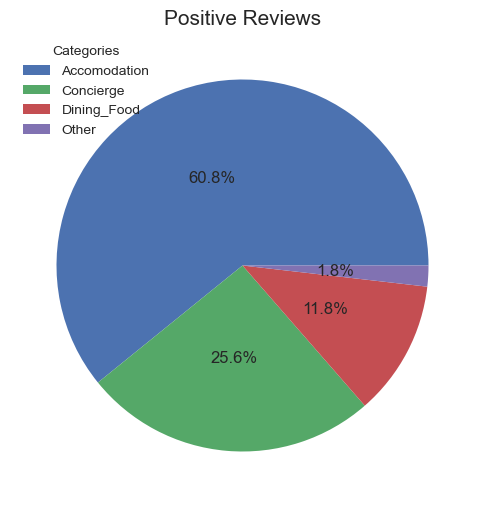

In [ ]:
# Use predefined style
plt.style.use('seaborn-deep') 

# Set figure size
plt.figure(figsize=(6, 12))

# Create pie-chart which shows percentage of observations in each service  category
# 1. Define x-value - we want to get the count of rows for each value in the column using .value_counts()
x = df_positive_reviews['category'].value_counts(sort=False)
# 2. Define labels
mylabels = ['Accomodation', 'Concierge', 'Dining_Food', 'Other']
# 3. Plot pie chart for variable x, percentage values should be displayed in certain distance 
# between center of pie slice and start of the text as well as in certain fontsize.
plt.pie(x, autopct='%1.1f%%', pctdistance=0.5, textprops={'fontsize': 12})

# Set title
plt.title("Positive Reviews", fontsize = 15)

# Create legend
plt.legend(mylabels, title='Categories', loc = 'upper left')

# Show graphicx =df_positive_reviews['category'].value_counts()
plt.show()

In [ ]:
import sqlalchemy
from sql_functions import get_dataframe

In [1]:
schema = 'cgn_analytics_23_3'
get_dataframe(f'SELECT count(*) FROM {schema}.booking_hotel_gp4')

NameError: name 'get_dataframe' is not defined

In [ ]:
df = pd.read_sql_query (sql=f'SELECT * FROM {schema}.booking_hotel_gp4'  ,con = engine)

In [ ]:
df.head()

,hotel_name,location,hotel_rating,no_of_reviews,room_score,room_type,bed_type,room_price(USD),final_review_score,country
0,Krabi La Playa Resort - Sha Plus ...,Ao Nang Beach ...,8.2,141.0,8.6,Deluxe Double or Twin Room ...,1 double or 2 twins ...,44.29,Very good,"{""Ao Nang Beach ..."
1,Kc Beach Club & Pool Villas ...,"Chaweng City Center , Chaweng ...",7.1,193.0,8.8,Double Room with Balcony and Sea View ...,1 queen bed ...,65.31,Good,"{""Chaweng City Center "","" Chaweng ..."
2,Rawai Vip Villas & Kids Park ...,Rawai Beach ...,8.3,63.0,8.9,2 Bedroom Pool Villa ...,2 queen beds ...,132.07,Very good,"{""Rawai Beach ..."
3,"Furamaxclusive Sathorn, Bangkok ...","Bang Rak, Bangkok ...",7.7,317.5,8.1,Executive Double Room ...,1 full bed ...,44.36,Good,"{""Bang Rak"","" Bangkok ..."
4,Bo Phut Resort And Spa - Sha Plus ...,Bophut ...,9.3,294.0,9.6,Villa with Garden View ...,1 double or 2 twins ...,188.39,Wonderful,"{""Bophut ..."


In [ ]:
#scatter plot

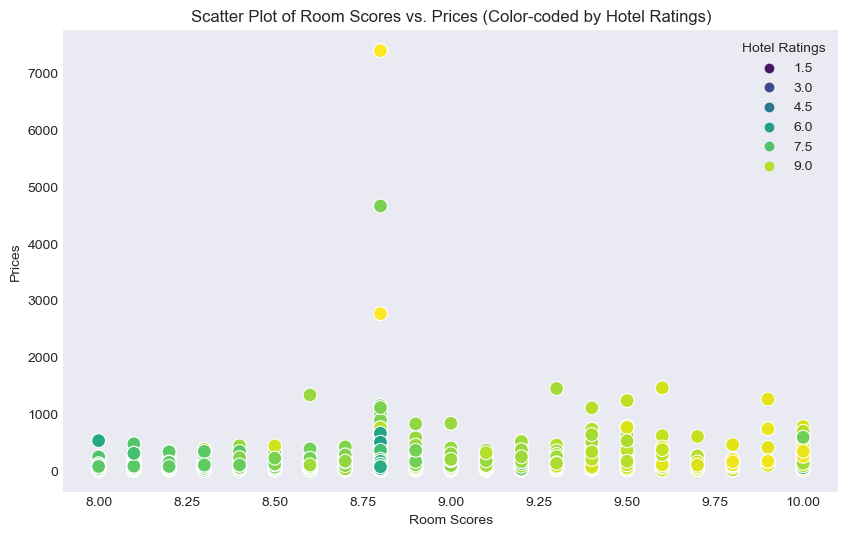

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='room_score', y='room_price(USD)', hue='hotel_rating', data=df, palette='viridis', s=100)
plt.xlabel('Room Scores')
plt.ylabel('Prices')
plt.title('Scatter Plot of Room Scores vs. Prices (Color-coded by Hotel Ratings)')
plt.legend(title='Hotel Ratings')
plt.show()

In [137]:
df_positive_reviews

NameError: name 'df_positive_reviews' is not defined

In [138]:
df_new_dataset

NameError: name 'df_new_dataset' is not defined